<a href="https://colab.research.google.com/github/Ajiboyefemifaith/Titanic/blob/main/TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES AND DATA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=15,15
sns.set_style('darkgrid')


In [ ]:
data=pd.read_csv('train.csv')

# CLEANING DATA

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data.shape

(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

A large portion of the cabin and age data is missing. For the cabin, we only have 204 available data out of 891 while for Age, we have 741 available data. Only 2 values are missing in the embarked column. We might have to drop the  Cabin column since majority of the data is missing or we fill it with cabin=1 or 0,where 1 equals available and o=none available.

# EXPLORATORY DATA ANALYSIS


This dataset contains the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.



# Data Dictionary
Variable	Definition	Key

survival;	Survival	0 = No, 1 = Yes

pclass;	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex;	Sex	
Age;	Age in years	
sibsp;	number of siblings / spouses aboard the Titanic	
parch; number of parents / children aboard the Titanic	
ticket;	Ticket number	
fare;	Passenger fare	
cabin;	Cabin number	
embarked;	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


# Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them

# VISUALIZATIONS

Let's start by visualizing the categorical variables to investigate and to be able to predict the survivors of the titanic incident.
The categorical variables in this dataset include-

The 'Survived' column is our target variable and it tells us the passengers that survived the incident. 

SURVIVED


Let us find out the number of passengers that survived and those who did not.

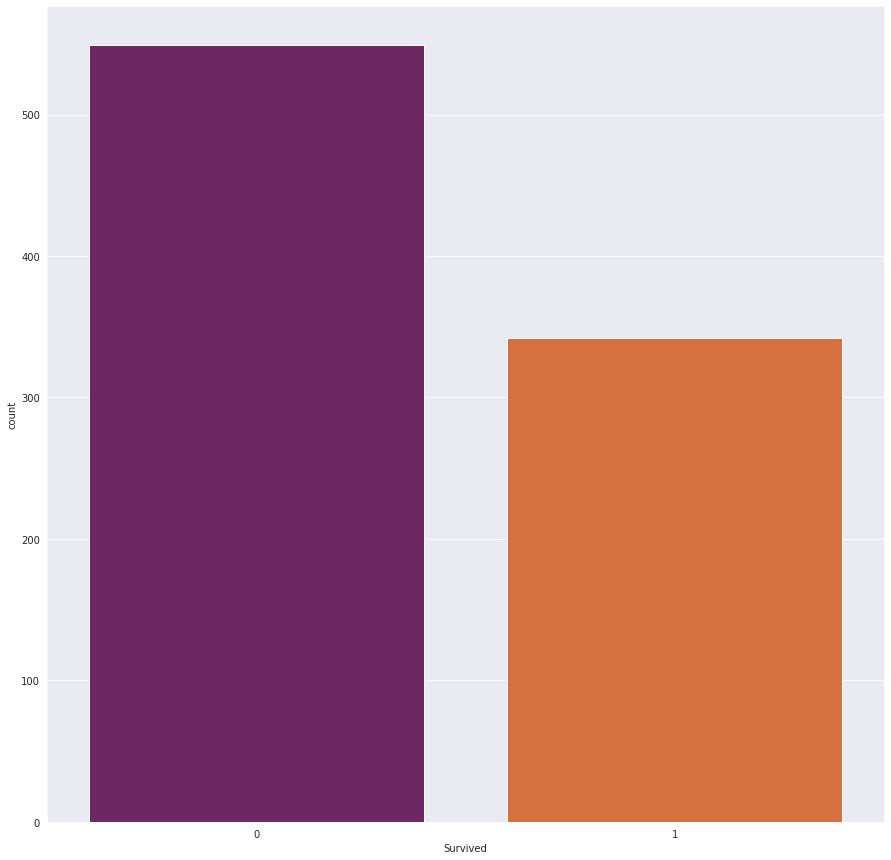

In [ ]:
sns.countplot(data=data, x= "Survived", palette='inferno')
plt.show()

A large proportion of the passenger population did not survive the accident.

**SEX**

This represents the gender of the passengers. Let's find out the gender of the majority of the passengers and what gender of the passenger population died the most.

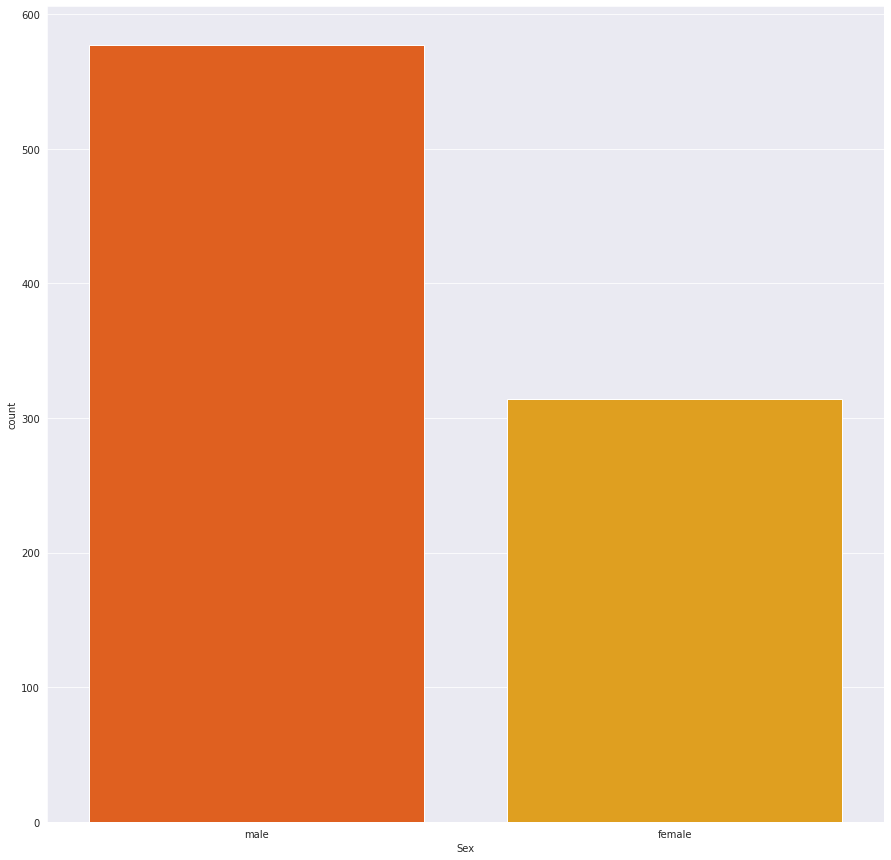

In [ ]:
sns.countplot(data=data, x='Sex', palette="autumn")
plt.show()

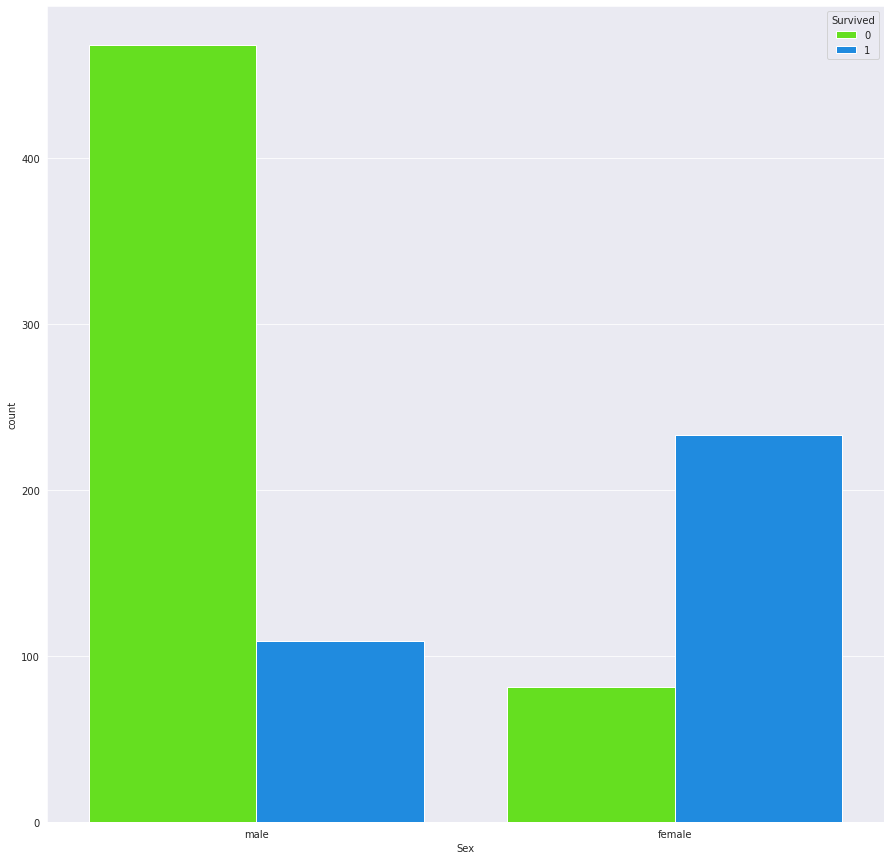

In [ ]:
sns.countplot(data=data, x='Sex', hue="Survived", palette="gist_rainbow")
plt.show()

From our visualization, it is clear that the majority of the passengers aboard were men. We can also deduce that a very large number of male passengers lost thier lives in the ship wreck. The female population did not lose quite a large number and the total female population is small compared to the male.

Pclass

This represents the socio-economic status (SES) of the passengers aboard. Where 
1st = Upper
2nd = Middle
3rd = Lower

Let's find out the number of passengers in each class.

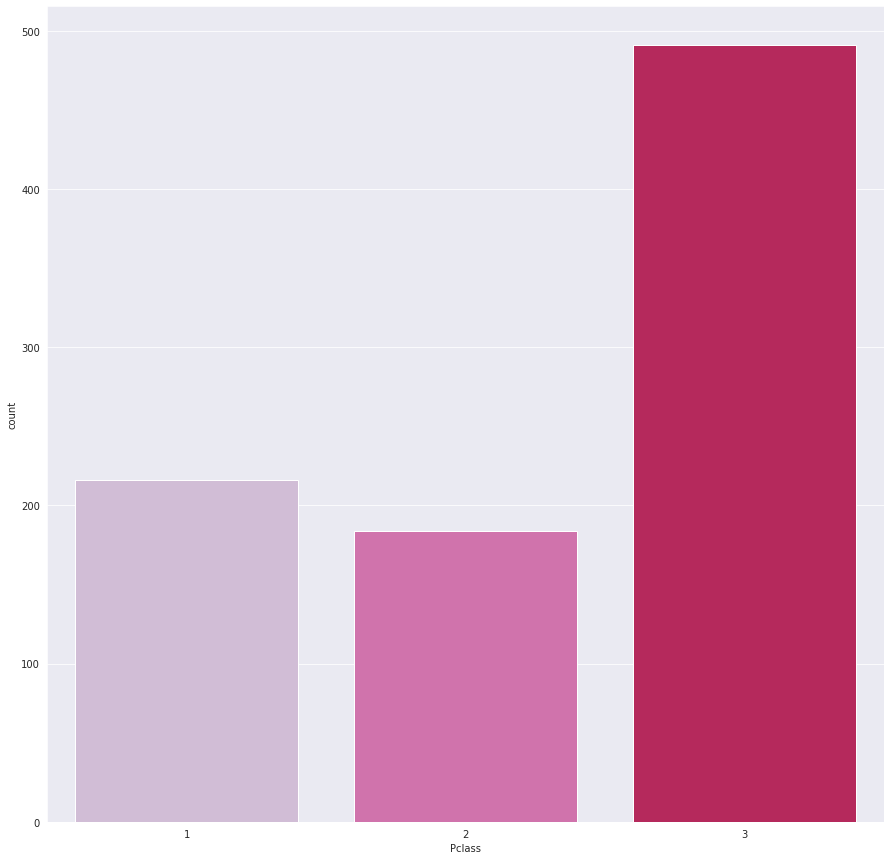

In [ ]:
sns.countplot(data=data, x='Pclass', palette="PuRd")
plt.show()

We can tell that the third class has the highest number of passengers. This could be due to the cheap fare rate and socio economic classes of people. The fist classs chamber also had a number of passengers than the second class chamber. Let us investigate the number of passsengers that survived in each chamber.

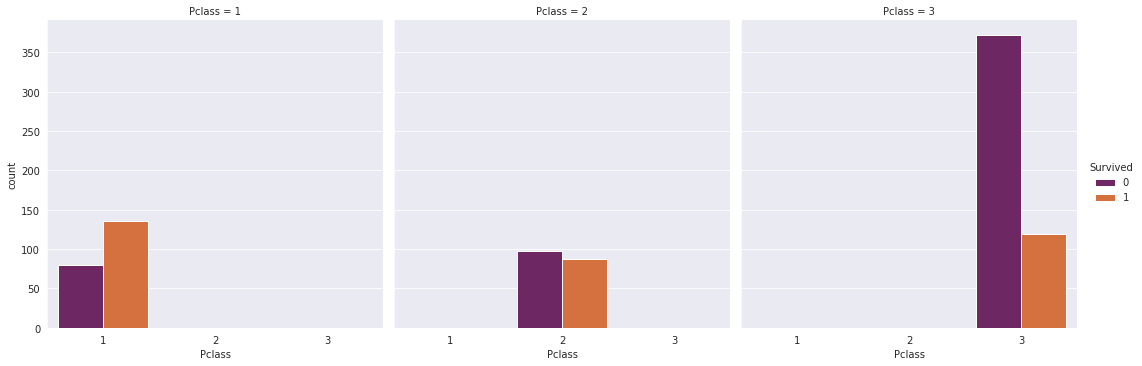

In [ ]:
sns.catplot(data=data, x='Pclass', hue='Survived', kind='count', col='Pclass', palette='inferno')
plt.show()

From our visualization, it is evident that majority of the lower class passengers died from the ship wreck. This could be that priority of survival was given to people according to thier socio-economic status. The second class also had a high number of death than the first class. The passengers in the second class that survived is almost equal to those that lost thier lives. The first class chamber had the least number of victims and the highest number of survival .

let us find out the gender of passengers in each class that either died or survived the ship wreck.

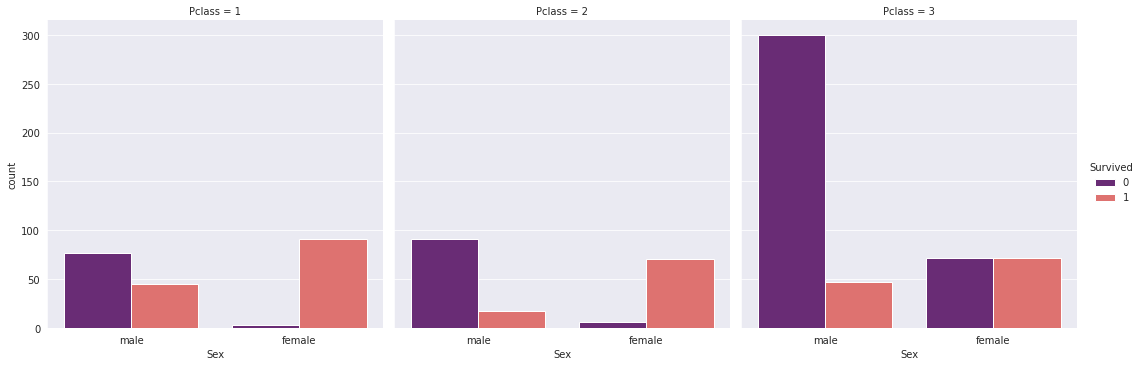

In [ ]:
sns.catplot(data=data, x='Sex', hue='Survived', kind='count', col='Pclass', palette='magma')
plt.show()

In first class, it is evident that majority of the female passengers  were saved while a number of male pasengers were saved but the number of those that died was still more than those saved.
In second class, the female passengers had a very high survival rate. a very small number of male passengers survived.
In third class, the same number of females survuved and also lost thier lives. A very high large portion of the male passenger population lost their lives.

It can therefore be said that females where given more survival priority.

Embarked

This column tells us the Port of Embarkation of the passengers. This could be  C = Cherbourg, Q = Queenstown, S = Southampton. Let's visualize the number of passengers that used the 3 ports

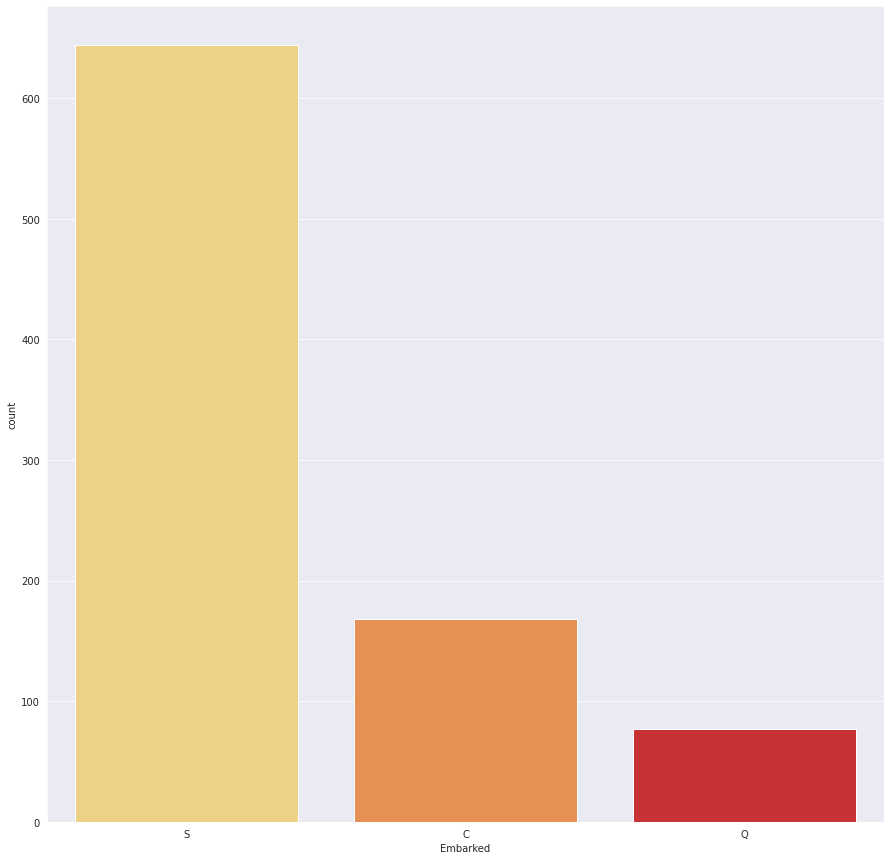

In [ ]:
sns.countplot(data=data, x='Embarked', palette="YlOrRd")
plt.show()

Majority of the passengers embarked from Southampton while the least embarked from Queenstown port.

Let's visualize the number of passengers that survived based on their port of embarkation.

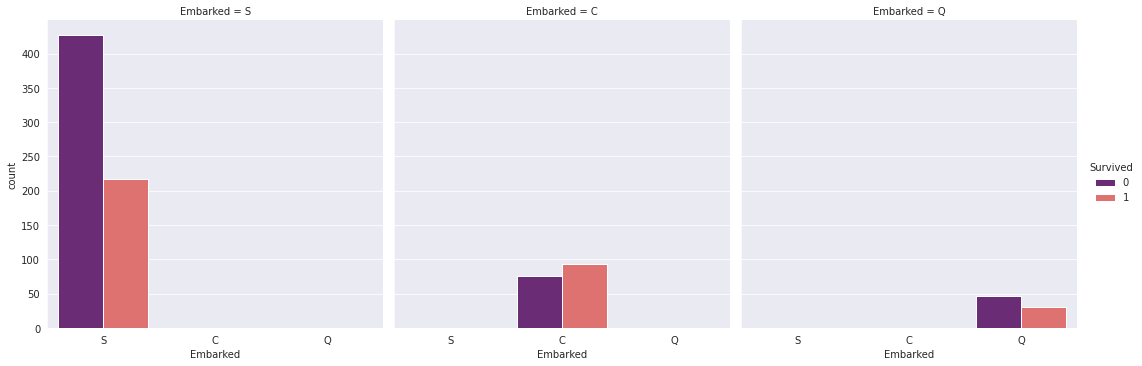

In [ ]:
sns.catplot(data=data, x='Embarked', hue='Survived', kind='count', col='Embarked', palette='magma')

A large number of passengers that used the Southampton port lost their lives.The Southampton port also had the highest number of passengers that survived. The number of those who survived from Cherbourg port is higher than those who did not. Let us investigate further, the relationship between the port of embarkation,class tickets and survival.

Let us investigate the class tickets the passengers purchased from each port.

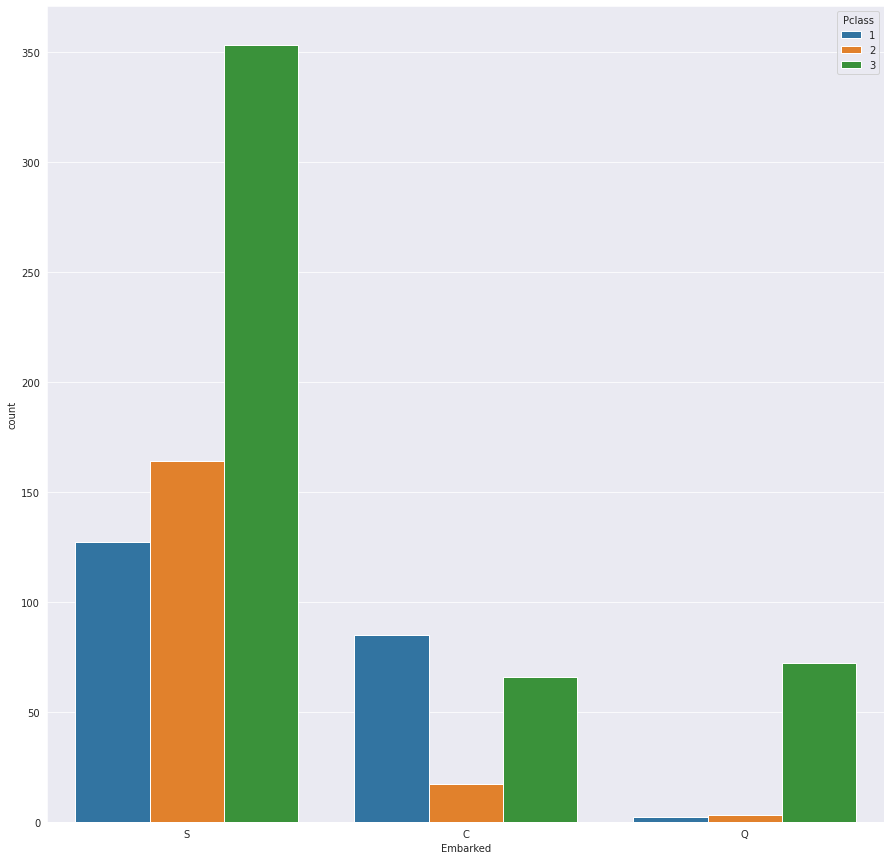

In [ ]:
sns.countplot(data=data, x='Embarked', hue='Pclass')
plt.show()

From the Southampton port majority of the passengers bought the 3rd class ticket. A very few passengers bought second class tickets from Cherbourg while majority bought the first class ticket. The number of passengers that bought third class ticket in Queenstown is the highest while first class and second class passengers from here is almost negligible.

Let's visualize whether the port passengers boarded from and the class ticket they bought has anything to do with survival.

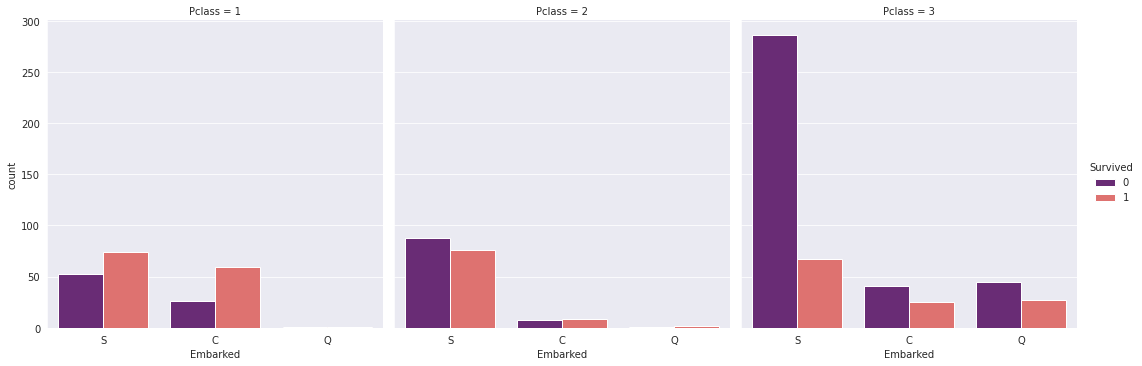

In [ ]:
sns.catplot(data=data, x='Embarked', hue='Survived', kind='count', col='Pclass', palette='magma') 
plt.show()

Majority of passengers that used first class and got their tickets from Southampton and Chebourg survived. From the third class we can say that a large number of passengers that used the southampton port did not survive. 

Age

This column represent the age of the passengers. Let us visualize the age distribution of the passengers.

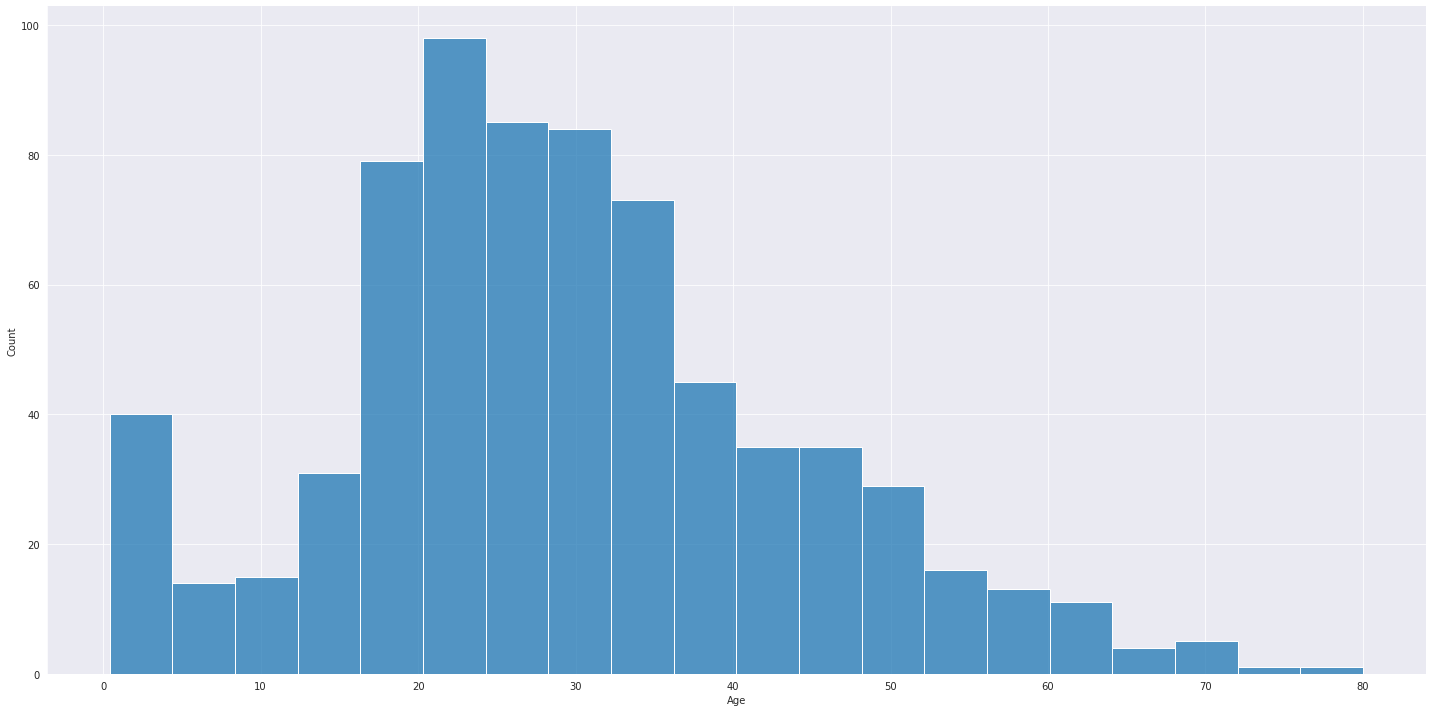

In [ ]:
sns.displot(data=data, x='Age', aspect=2, height=10)
plt.show()

Majority of the passengers aboard were between the age of 15-40. Was age considered while saving the victims of the ship wreck?

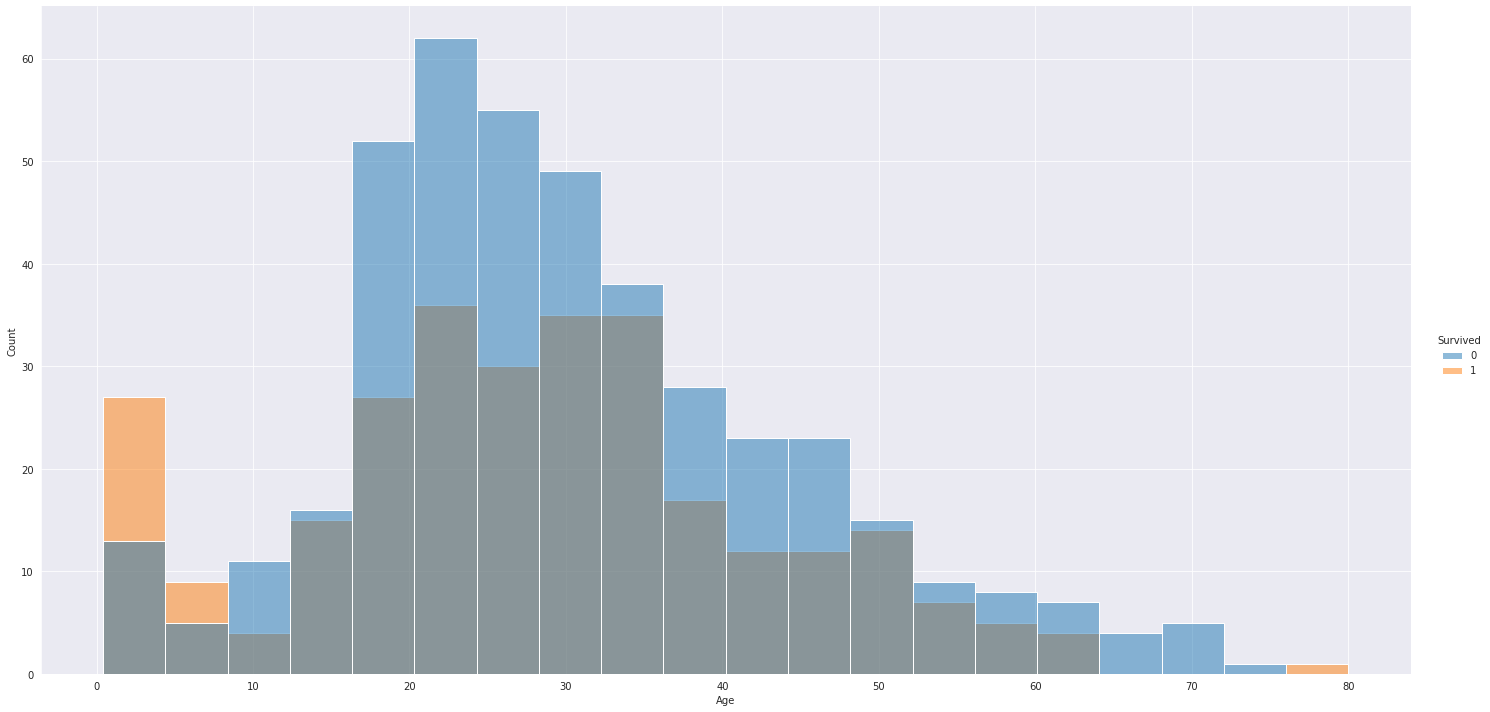

In [ ]:
sns.displot(data=data, x='Age', aspect=2, height=10, hue='Survived')
plt.show()

SibSp

This column represent the number of siblings / spouses aboard the Titanic. Let us visualize the distribution of passengers with or without relations.

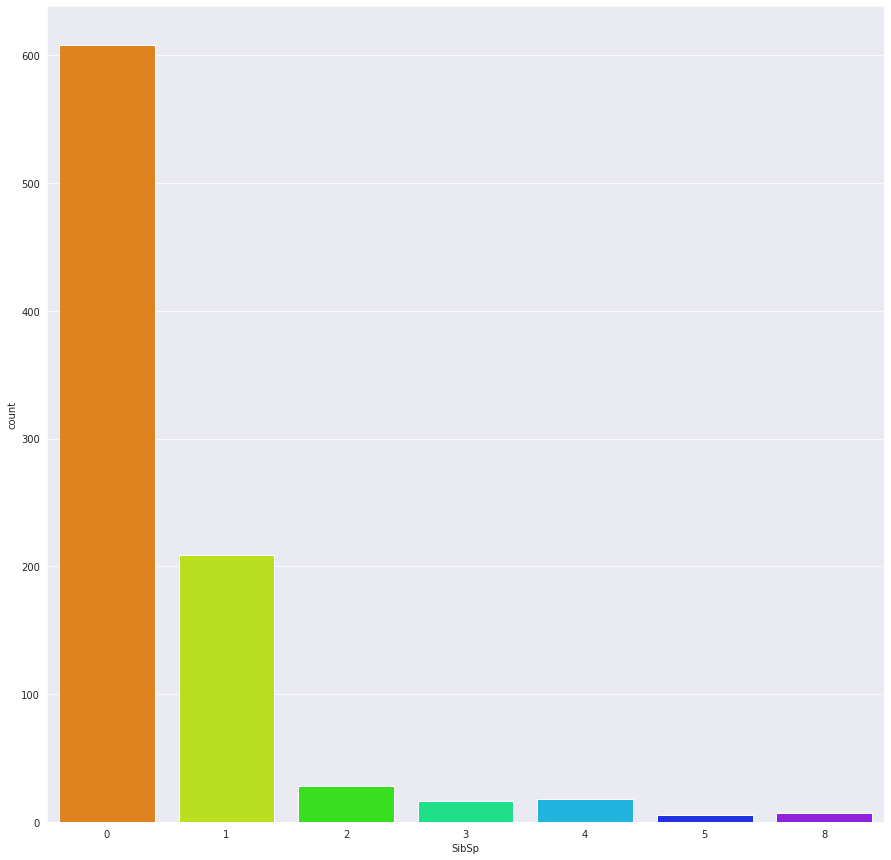

In [ ]:
sns.countplot(data=data, x='SibSp', palette='gist_rainbow')
plt.show()

Most of the passengers were without siblings / spouses. A high number of passengers had one relation with them. Let us investigate if  having a sibling or spouse increased survival rate. Some passengers even had up to 8 siblings or spouses with them. Let us visualize the survival chance if passengers had a sibling or spouse with them or were alone.

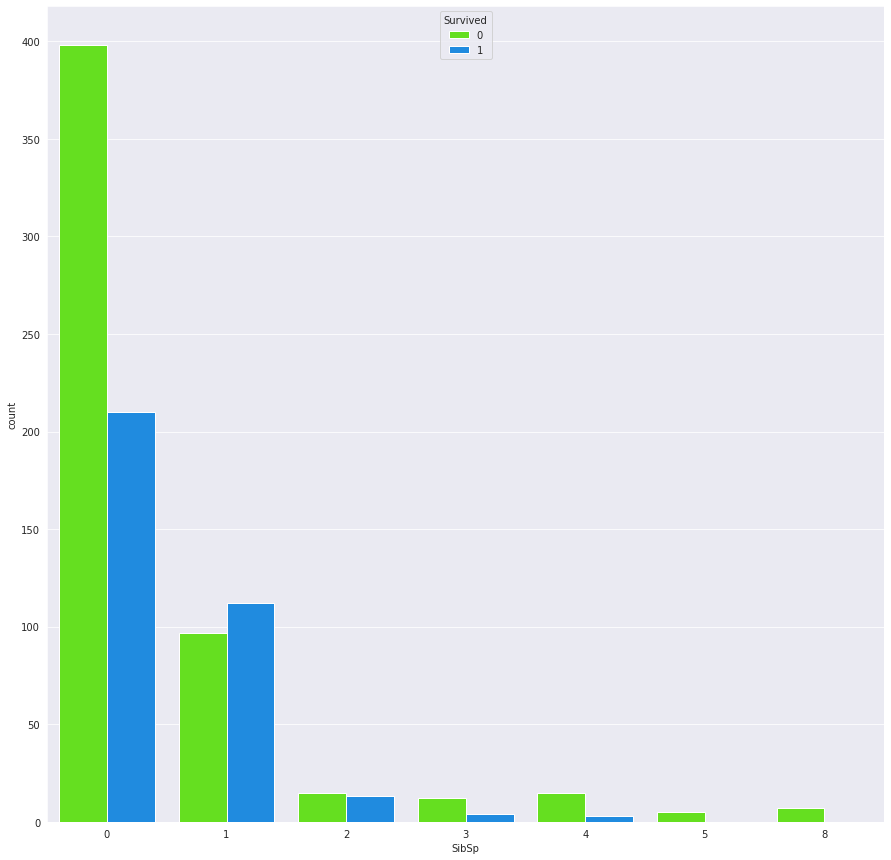

In [ ]:
sns.countplot(data=data, x='SibSp', palette='gist_rainbow', hue='Survived')
plt.show()

A very large number of people without relations died in the accident. This means people with no siblings or relation are more likely to die than those with. People with one or two siblings survived more.

Parch

This column represents the number of parents / children aboard the Titanic. Let us visualize the number of parents and children aboard.

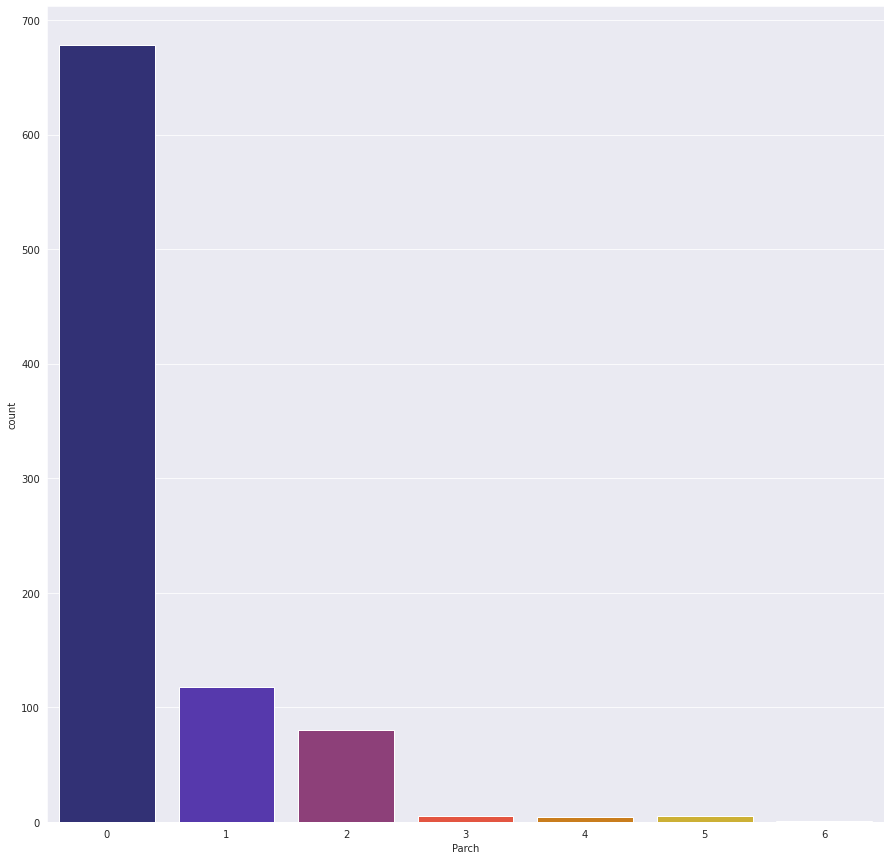

In [ ]:
sns.countplot(data=data, x='Parch', palette='CMRmap')
plt.show()

Majority of the passengers did not have any parent or child. Did having a parent or child increase rate of survival?

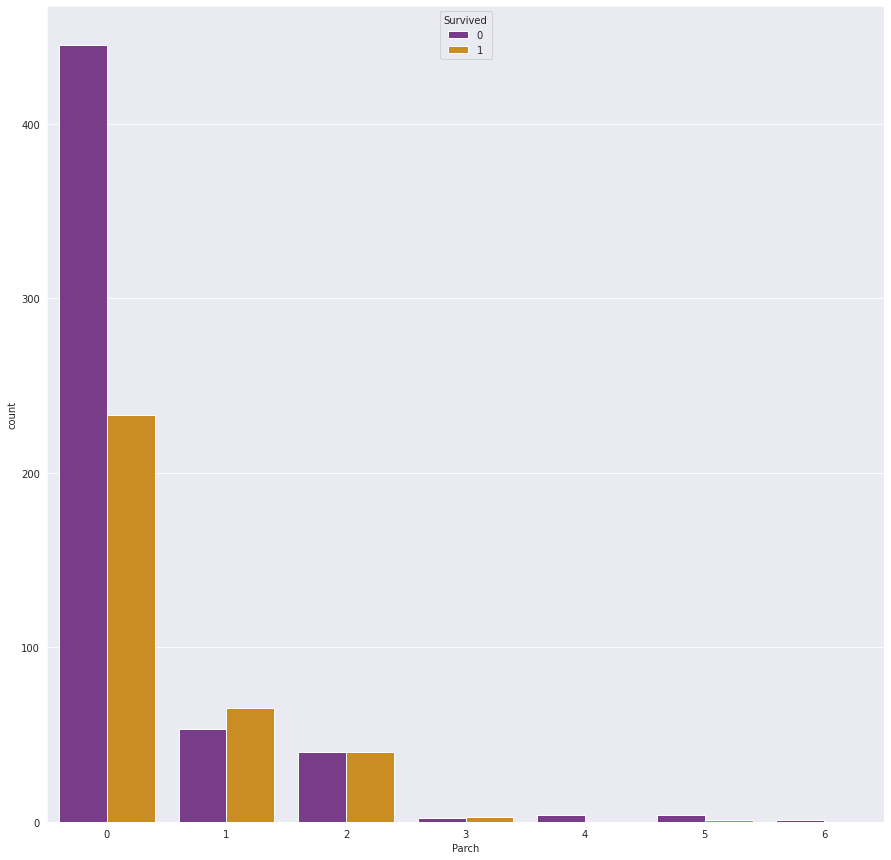

In [ ]:
sns.countplot(data=data, x='Parch', palette='CMRmap', hue='Survived')
plt.show()

There is a high chance of survival if you have one or two parents or children with you. Majority of those without a parent or child died in the accident. 

Fare

This is the amount passengers paid before boarding the ship. Let us visualize the distribution.


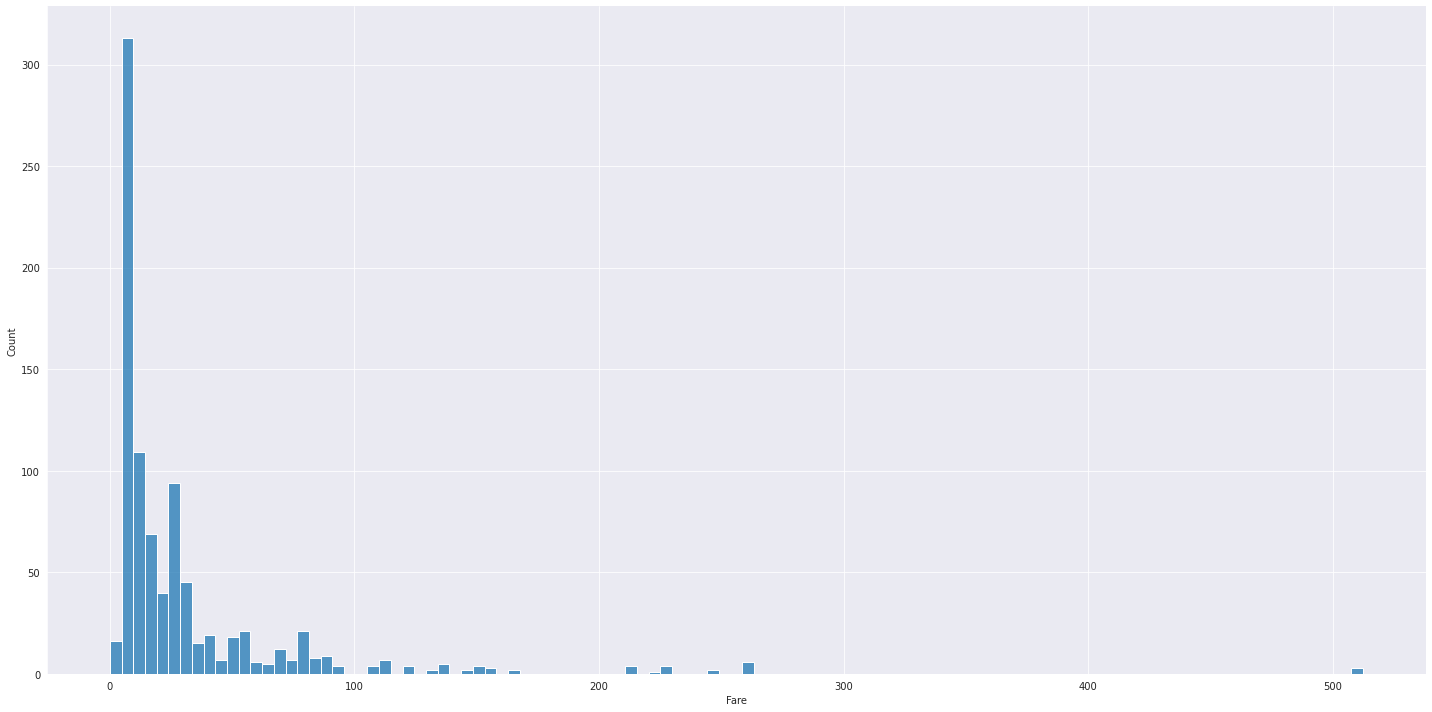

In [ ]:
sns.displot(data=data, x='Fare', palette='inferno',aspect=2, height=10 )
plt.show()

Majority of the passengers paid between 0 to 100. Some passengers paid over 500. Could there be a relationship between fare and chance of survival? There is no unit

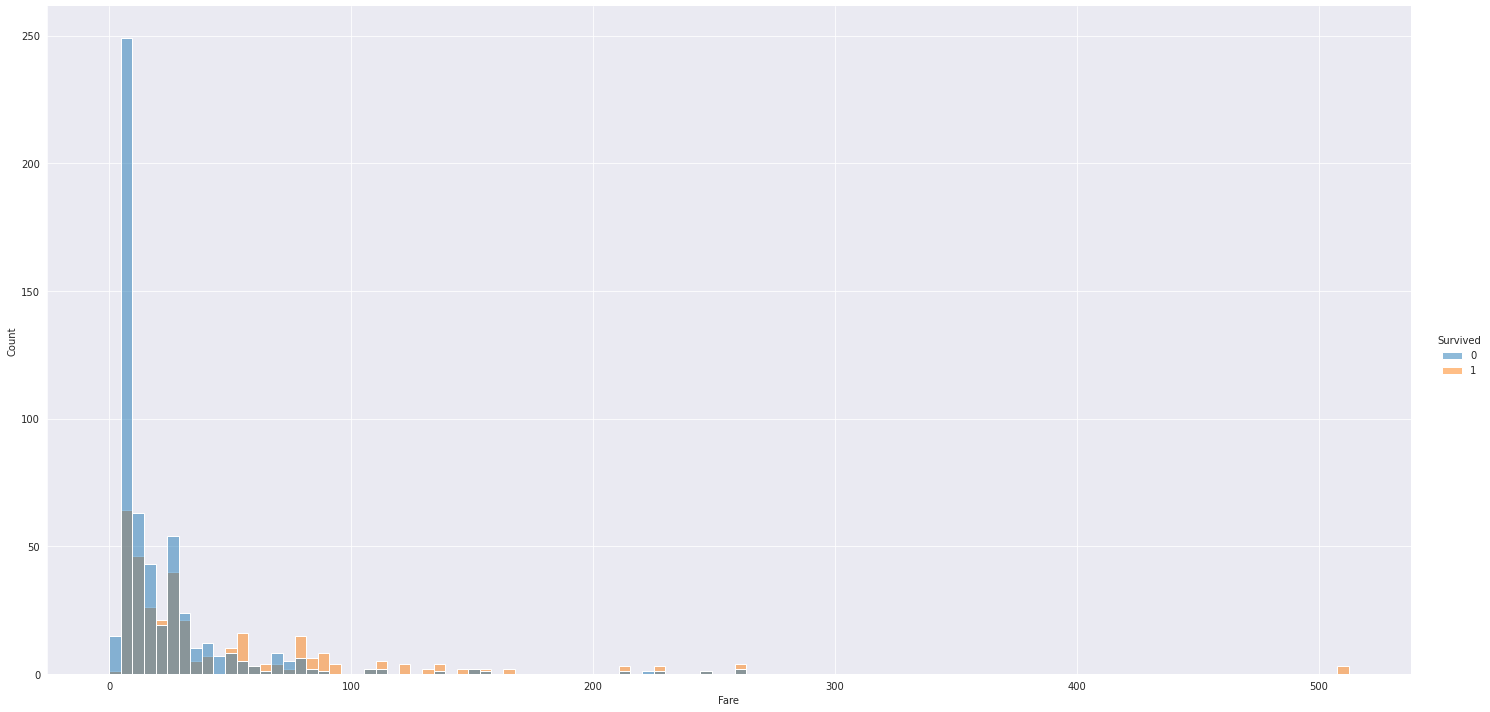

In [ ]:
sns.displot(data=data, x='Fare', hue='Survived',aspect=2,height=10 )
plt.show()

Passengers that paid a high fare rate had more chance of survival.

# HEAT MAP

In [ ]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


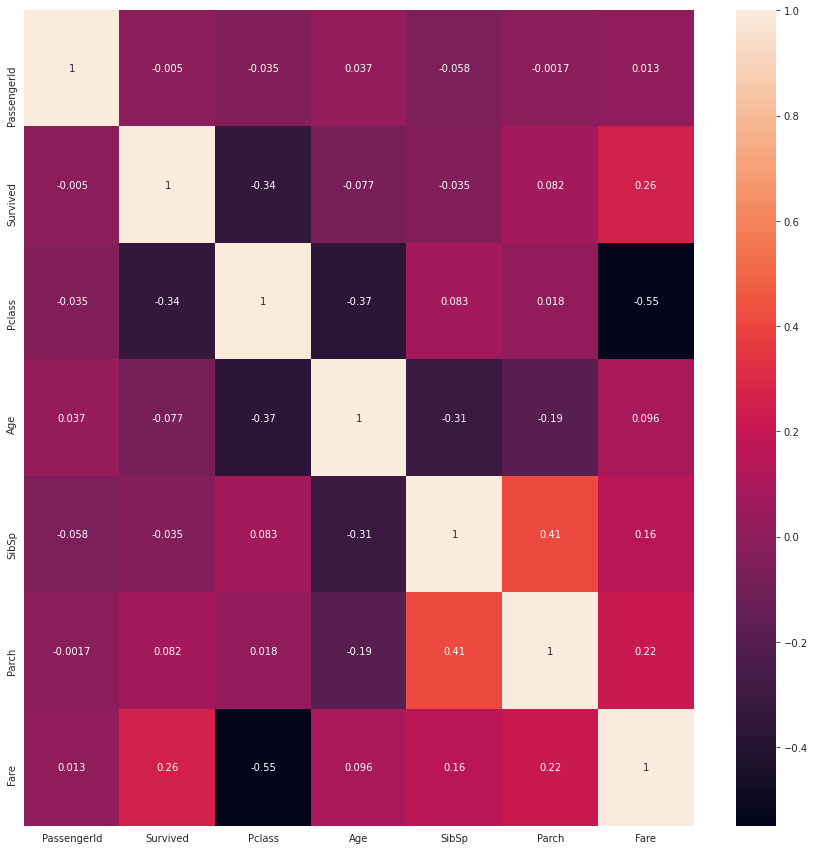

In [ ]:
sns.heatmap(data.corr(), annot=True)
plt.show()

There is a high corelation between Survived and Fare.

# INSIGHTS

 Over 500 passengers died out of 891 passengers that boarded the Titanic.

 Majority of the passengers aboard were males.

Majority of the victims were male passengers. More female passengers survived that is, priority was given to the female passengers.
 
Third class had the highest number of passengers aboard.
 
There is a high chance of survival for passengers that got first class tickets and are females.

Majority of the passenger population was aged between 15-40

Priority was also given to Children(age 0-15).

Majority of the passengers had no parent or children with them. Passengers without parents or children are more likely to die. Passengers with one or two parents or children will likely survive.

Majority of the passengers paid a fare betwwen 0-100. Some passengers paid above 500.

Passengers that paid a high fare rate would most likely survive.
 
Priority of survival was given to people according to thier socio-economic status. 

Passengers with no siblings or spouse are more likely to die than those with. People with one or two siblings are likely to survive more.

There is a little survival chance for passengers who baorded from Southampton and bought a third class ticket.

There is a possitive correlation between survival and fare(0.26).


# CONCLUSION


From our visualizations and findings, we can conclude that;

Passengers within the age of 0-15 would most likely survive.

Passengers that got a first class ticket and are females would most likely survive.

Passengers with one or two parent, siblings, children or spouse would most likely survive.

Passengers that paid a high fare rate would most likely survive.

The above insights and conclusion should be able to help us predict the passengers that died or survived the ship wreck.